In [ ]:
#Mounting the harddrive and setting it up
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/AI319\ Codes

/content/drive/MyDrive/Colab Notebooks/AI319 Codes


**1. Sampling an Image**

*   Upsampling - Increasing the no. of pixels
*   Downsampling - Decreasing the no. of pixels

In [ ]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread, imsave
from skimage.transform import downscale_local_mean, pyramid_expand
import skimage

In [ ]:
#We will use downscale_local utility of the skimage for downsampling the image
#You could find the documentation here:
#https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.downscale_local_mean

In [ ]:
image = imread('penguins.jpg')
shape = image.shape
factors = np.arange(1,10)
images_dp={}
for factor in factors:
  image_dp = downscale_local_mean(image, factors=(factor, factor, 1)).astype(int)
  print(image_dp.shape)
  images_dp[factor]=np.array(image_dp)

(768, 1024, 3)
(384, 512, 3)
(256, 342, 3)
(192, 256, 3)
(154, 205, 3)
(128, 171, 3)
(110, 147, 3)
(96, 128, 3)
(86, 114, 3)


In [ ]:
print(images_dp[1].shape)

(768, 1024, 3)


In [ ]:
def plot(images_dp):
  fig, axes = plt.subplots(3,3, figsize=(15, 15))
  axes = axes.ravel()
  for i, (factor, img) in enumerate(images_dp.items()):
    axes[i].imshow(img)
    axes[i].set_title('$Pixels={0}, factor={1}$'.format(img.shape[0]*img.shape[1], factor))
    fig.subplots_adjust(hspace=.5)


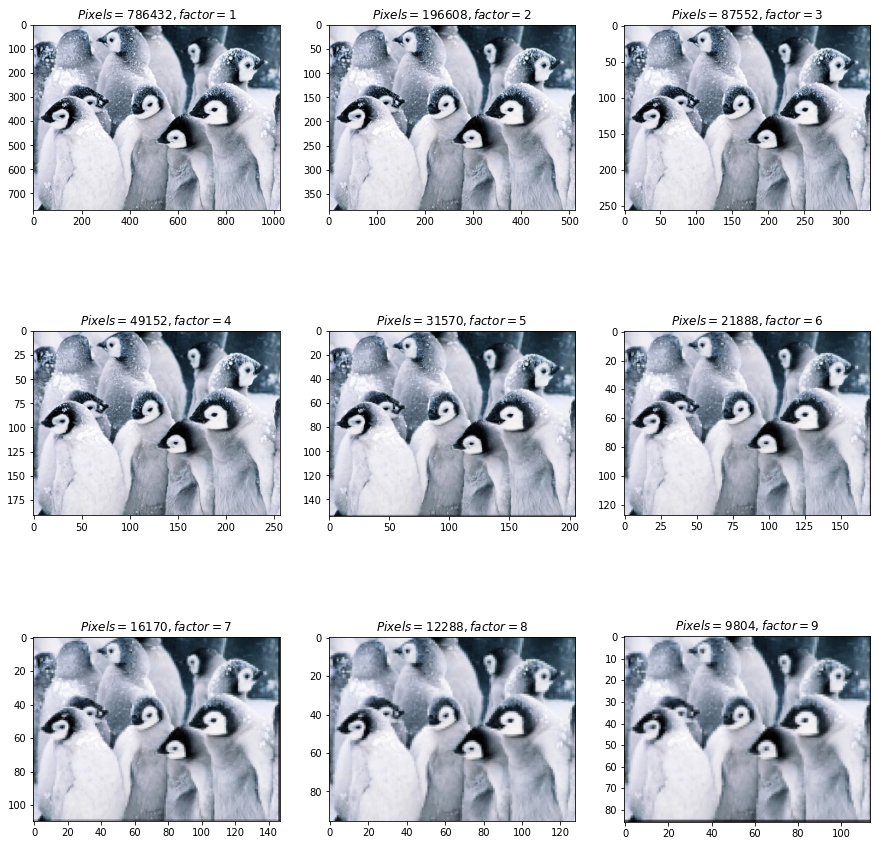

In [ ]:
plot(images_dp)

In [ ]:
imsave('Downsmapled.jpg', images_dp[9].astype(np.uint8))

In [ ]:
#We will use downscale_local utility of the skimage for Upsampling the image
#You could find the documentation here:
#https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.pyramid_expand

In [ ]:
import skimage

In [ ]:
image_dp = imread('Downsmapled.jpg')
image_dp_gray = skimage.color.rgb2gray(image_dp)
print(image_dp.shape)
upsampled_img = pyramid_expand(image_dp_gray, upscale=9)
#image_up = np.zeros((upsampled_img.shape[0], upsampled_img.shape[1], 3))
#image_up[:,:,0]=upsampled_img
#image_up[:,:,1]=upsampled_img
#image_up[:,:,2]=upsampled_img
image_up = skimage.color.gray2rgb(upsampled_img)

(86, 114, 3)


In [ ]:
image_up.shape

(774, 1026, 3)

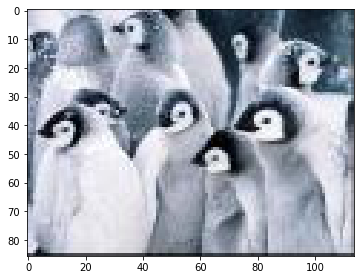

In [ ]:
imshow(image_dp)

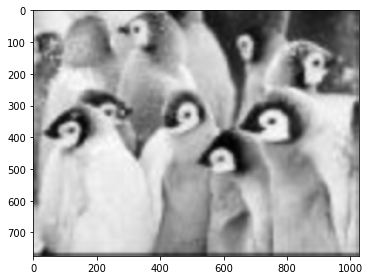

In [ ]:
imshow(image_up)

**Task 1:** Upsample the image with the correct color information and without smoothening.

**2. Color Spaces**

*   2a. RGB -Red, Green, Blue
*   2b. HSV - Hue, Saturation, Value
*   2c. LAB - Lightness, Red/Green, Blue/Yellow





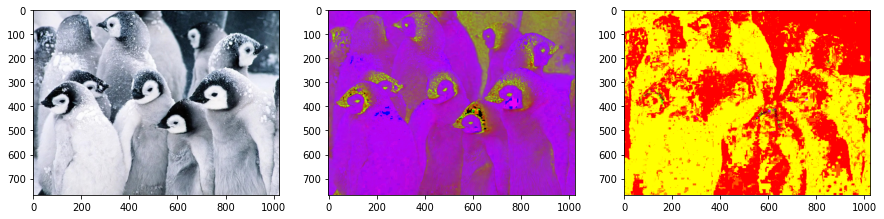

In [ ]:
#Image Conversion
image_RGB = imread('penguins.jpg')
image_HSV = skimage.color.rgb2hsv(image_RGB)
image_LAB = skimage.color.rgb2lab(image_RGB)

fig, axes = plt.subplots(1,3, figsize=(15, 15))
axes = axes.ravel()
for i, img in zip(range(0,3),[image_RGB, image_HSV, image_LAB]):
  axes[i].imshow((img))
  fig.subplots_adjust(hspace=.5)

**Task 2:** Analyze and plot every channel of the the above color spaces and see how they differ from each other.

**3. Image Compositing and Matting**


*   Create a binary Mask of an image
    1. Otsu Algorithm:<br>
    https://en.wikipedia.org/wiki/Otsu%27s_method
        


> Indented block


        1a. Compute histogram and probabilities of each intensity level.

        1b. Set initial class(pixel) probability and pixel class mean. 
        
        1c. Loop through threshold=1...Max Intensity:
          
          1ca. Update the class probilities and class means<br>
          
          1cb. Compute the inter-class variance
        
        1d. Desired threshold corresponds to the maximum inter-class variance.




*   Matting with binary mask



In [ ]:
from skimage import filters
import cv2 as cv
camera = skimage.data.camera()
val = filters.threshold_otsu(camera)
mask = camera.copy()
mask[camera < val] = 255
mask[camera > val] = 0
#Matting
masked = cv.bitwise_and(camera, mask)
masked[mask==0] = 255

<ipython-input-228-7e5483acf42d>:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bins_center = skimage.exposure.histogram(image)


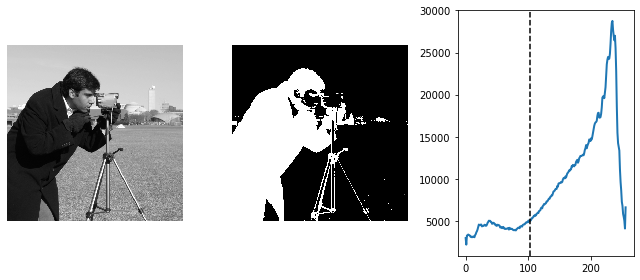

In [ ]:
#Code Reference from https://scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html
hist, bins_center = skimage.exposure.histogram(image)
plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

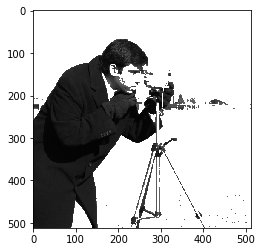

In [ ]:
plt.figure(figsize=(9, 4))
plt.imshow(masked, cmap='gray', interpolation='nearest')

**Task 3:** Build a almost perfect mask for the image and perform the matting so only the person with camera should be extracted form the origial image

**4. Filtering an image**


*   Blur
*   Sharpened
*   Dilated
*   Erosion





(-0.5, 1023.5, 767.5, -0.5)

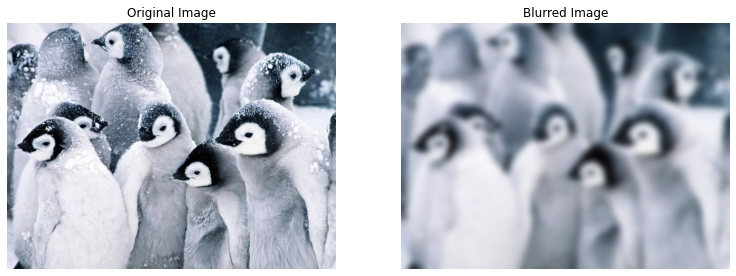

In [ ]:
#Gaussain Blur
#http://man.hubwiz.com/docset/Scikit-image.docset/Contents/Resources/Documents/api/skimage.filters.html#skimage.filters.gaussian
#https://en.wikipedia.org/wiki/Gaussian_filter
image = imread('penguins.jpg')
filtered_img = skimage.filters.gaussian(image, sigma=10, multichannel=True)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(filtered_img)
plt.title('Blurred Image')
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

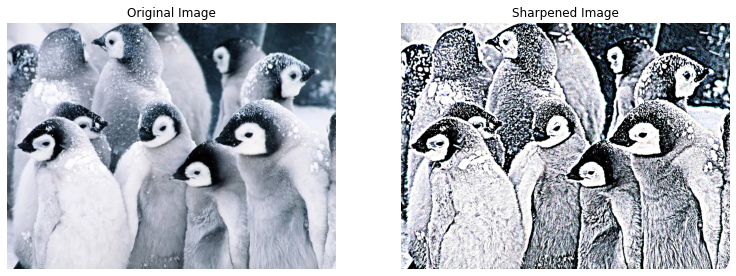

In [ ]:
#Image Sharpening
#https://github.com/scikit-image/scikit-image/blob/v0.19.2/skimage/filters/_unsharp_mask.py#L19-L146
image = imread('penguins.jpg')
filtered_img = skimage.filters.unsharp_mask(image, radius=5, amount=10.0, multichannel=True)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(filtered_img)
plt.title('Sharpened Image')
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

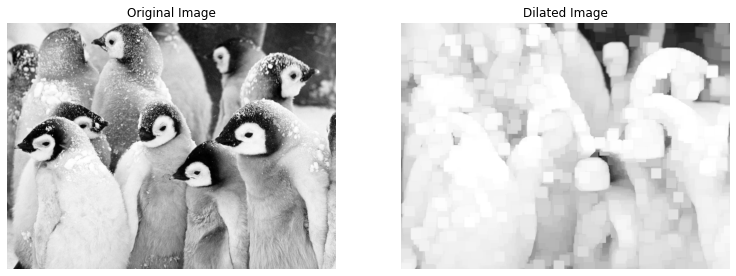

In [ ]:
#Image Dilation
#https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
image = imread('penguins.jpg')
image_gray = skimage.color.rgb2gray(image)
image_gray=image_gray/255
kernel = np.ones((7, 7), np.uint8)
dilated_img = cv.dilate(image_gray, kernel, iterations=5)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

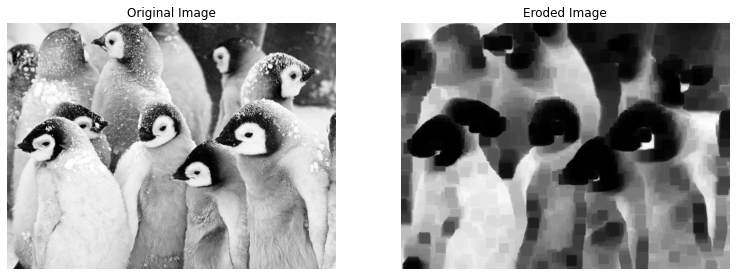

In [ ]:
#Image Erosion
#https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
image = imread('penguins.jpg')
image_gray = skimage.color.rgb2gray(image)
image_gray=image_gray/255
kernel = np.ones((7, 7), np.uint8)
eroded_img = cv.erode(image_gray, kernel, iterations=5)
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

**Task 4:** Take the eroded image and see if you can get the original image after dialating. If you can't why?